# Feature Engineering

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import MinMaxScaler
from imblearn.over_sampling  import SMOTENC
from imblearn.under_sampling import NearMiss

import matplotlib.pyplot as plt
import seaborn           as sns
sns.set_style("darkgrid")

import plotly_express as px

### Load Data from Fish & Wildlife Service, Forest Service and Environmental Protection Agency

In [2]:
# Load datasets
species = pd.read_pickle("../Data/FWS.pkl")
forests = pd.read_pickle("../Data/FS.pkl")
aqi     = pd.read_pickle("../Data/EPA.pkl")

# Merge datasets
species = species.merge(forests, on='State')
species = species.merge(aqi, left_on='State', right_index=True, how='left')

In [3]:
species.head()

,Family,Group,Region,Federal Listing Status,VIP,State,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days
0,Accipitridae,Birds,2,Not Listed,V,AL,32413,22877,324,251
1,Acipenseridae,Fishes,3,Not Listed,V,AL,32413,22877,324,251
2,Acipenseridae,Fishes,4,Threatened,V,AL,32413,22877,324,251
3,Sericostomatidae,Insects,4,Not Listed,I,AL,32413,22877,324,251
4,Rosaceae,Flowering Plants,4,Not Listed,P,AL,32413,22877,324,251


In [4]:
#px.choropleth(species, locationmode='USA-states', locations='State',
#              scope='usa', color="Good Days", 
#              color_continuous_scale=px.colors.sequential.Plasma)

In [5]:
# Drop multicollinear columns (state converted to continuous with total land area)
species = species.drop(['State'], axis = 1)
species.head()

,Family,Group,Region,Federal Listing Status,VIP,Total Land Area (Thousands of Acres),Forest Land Area (Thousands of Acres),Days with AQI,Good Days
0,Accipitridae,Birds,2,Not Listed,V,32413,22877,324,251
1,Acipenseridae,Fishes,3,Not Listed,V,32413,22877,324,251
2,Acipenseridae,Fishes,4,Threatened,V,32413,22877,324,251
3,Sericostomatidae,Insects,4,Not Listed,I,32413,22877,324,251
4,Rosaceae,Flowering Plants,4,Not Listed,P,32413,22877,324,251


### Feature Interactions

In [6]:
# Percentage of forest covereage
species['Total Land Acreage'] = species['Total Land Area (Thousands of Acres)']
species['Total Land Acreage'] = species['Total Land Acreage'].astype(float)

species['State Forest Coverage'] = species['Forest Land Area (Thousands of Acres)'] / species['Total Land Acreage']

# Drop columns
species = species.drop(['Total Land Area (Thousands of Acres)', 'Forest Land Area (Thousands of Acres)'], axis = 1)

In [7]:
# Ratio of good AQI days to total AQI days recorded in 2018
species['Good AQI Days per Year'] = species['Good Days'] / species['Days with AQI']

# Drop columns
species = species.drop(['Days with AQI', 'Good Days'], axis = 1)
species.head()

,Family,Group,Region,Federal Listing Status,VIP,Total Land Acreage,State Forest Coverage,Good AQI Days per Year
0,Accipitridae,Birds,2,Not Listed,V,32413.0,0.705797,0.774691
1,Acipenseridae,Fishes,3,Not Listed,V,32413.0,0.705797,0.774691
2,Acipenseridae,Fishes,4,Threatened,V,32413.0,0.705797,0.774691
3,Sericostomatidae,Insects,4,Not Listed,I,32413.0,0.705797,0.774691
4,Rosaceae,Flowering Plants,4,Not Listed,P,32413.0,0.705797,0.774691


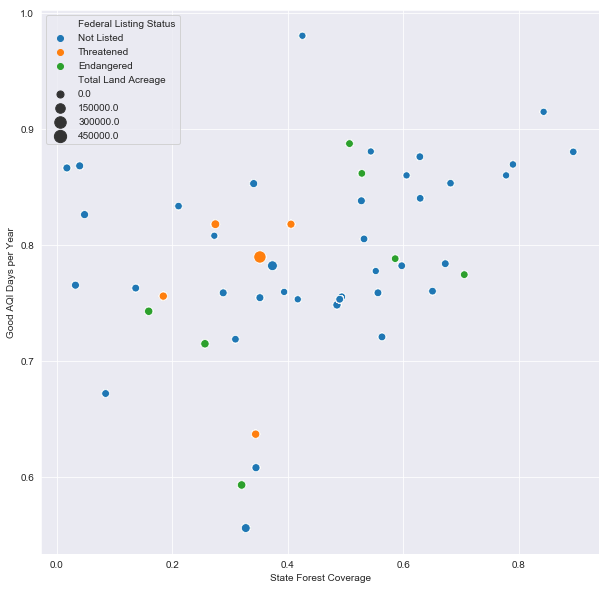

In [8]:
fig, aa = plt.subplots(figsize=(10,10))

sns.scatterplot(x     = 'State Forest Coverage',
                y     = 'Good AQI Days per Year',
                hue   = 'Federal Listing Status',
                size  = 'Total Land Acreage',
                sizes = (50,150),
                data  = species)

### Create Dummy Variables for Categorical Data

In [9]:
#create dummy variables
species = pd.get_dummies(data=species, columns=['Family', 'Group', 'Region', 'VIP'])
print(species.shape)
species.head()

(5475, 607)


,Federal Listing Status,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Family_Acanthaceae,Family_Accipitridae,Family_Aceraceae,Family_Achatinellidae,Family_Acipenseridae,Family_Acrididae,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_NMFS,VIP_I,VIP_P,VIP_V
0,Not Listed,32413.0,0.705797,0.774691,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Not Listed,32413.0,0.705797,0.774691,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,Threatened,32413.0,0.705797,0.774691,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,Not Listed,32413.0,0.705797,0.774691,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,Not Listed,32413.0,0.705797,0.774691,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [10]:
#species = species[['Federal Listing Status',
# 'Total Land Acreage','State Forest Coverage','Good AQI Days per Year',
# 'Family_Orchidaceae','Family_Unionidae','Family_Vespertilionidae','Family_Asteraceae','Family_Fabaceae',
# 'Family_Cyperaceae','Family_Cyprinidae','Family_Scrophulariaceae','Family_Brassicaceae','Family_Rallidae',
# 'Family_Poaceae','Family_Accipitridae','Family_Salmonidae','Family_Laridae','Family_Lycaenidae',
# 'Family_Nymphalidae','Family_Ranunculaceae','Family_Liliaceae','Family_Rosaceae','Family_Scolopacidae',
# 'Family_Noctuidae','Family_Caryophyllaceae','Family_Emberizidae',
# 'Group_Amphibians','Group_Annelid Worms','Group_Arachnids','Group_Birds','Group_Clams',
# 'Group_Conifers and Cycads','Group_Corals','Group_Crustaceans','Group_Ferns and Allies','Group_Fishes',
# 'Group_Flatworms and Roundworms','Group_Flowering Plants','Group_Hydroids','Group_Insects','Group_Lichens',
# 'Group_Mammals','Group_Millipedes','Group_Reptiles','Group_Snails','Group_Sponges',
# 'Region_1','Region_2','Region_3','Region_4','Region_5','Region_6',
#'Region_7','Region_8','Region_NMFS',
# 'VIP_I','VIP_P','VIP_V']]
#print(species.shape)
#species.head()

### Set Target and Feature Variables

In [11]:
# Create target variables
y        = species['Federal Listing Status']
y_labels = list(y.unique())
print(y_labels)

# Create feature variables
X = species.drop(['Federal Listing Status'], axis = 1)
X.head()

['Not Listed', 'Threatened', 'Endangered']


,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Family_Acanthaceae,Family_Accipitridae,Family_Aceraceae,Family_Achatinellidae,Family_Acipenseridae,Family_Acrididae,Family_Acroceridae,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_NMFS,VIP_I,VIP_P,VIP_V
0,32413.0,0.705797,0.774691,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,32413.0,0.705797,0.774691,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
2,32413.0,0.705797,0.774691,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,32413.0,0.705797,0.774691,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,32413.0,0.705797,0.774691,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Create Training and Test Sets

In [12]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# data set statistics
data_stats = pd.DataFrame({'Train':        y_train.value_counts(),
                           'Test':         y_test.value_counts(),
                           'Train Normal': y_train.value_counts() / y_train.count(),
                           'Test Normal':  y_test.value_counts()  / y_test.count()})

data_stats.loc['Total'] = data_stats.sum().astype(int)
data_stats

,Train,Test,Train Normal,Test Normal
Not Listed,3090,769,0.705479,0.702283
Endangered,731,186,0.166895,0.169863
Threatened,559,140,0.127626,0.127854
Total,4380,1095,1.000000,1.000000


### Feature Scaling

In [13]:
non_categorical_cols = ['Total Land Acreage', 'State Forest Coverage', 'Good AQI Days per Year']
X_train.head()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Family_Acanthaceae,Family_Accipitridae,Family_Aceraceae,Family_Achatinellidae,Family_Acipenseridae,Family_Acrididae,Family_Acroceridae,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_NMFS,VIP_I,VIP_P,VIP_V
4685,167188.0,0.373382,0.782369,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2160,52326.0,0.047816,0.826446,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4702,167188.0,0.373382,0.782369,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3646,31115.0,0.597397,0.782353,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1764,4110.0,0.425304,0.980663,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
scaler                        = MinMaxScaler()
X_train[non_categorical_cols] = scaler.fit_transform(X_train[non_categorical_cols])
X_test[non_categorical_cols]  = scaler.transform(    X_test[non_categorical_cols])

X_train.head()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Family_Acanthaceae,Family_Accipitridae,Family_Aceraceae,Family_Achatinellidae,Family_Acipenseridae,Family_Acrididae,Family_Acroceridae,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_NMFS,VIP_I,VIP_P,VIP_V
4685,0.456293,0.405910,0.532875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2160,0.141563,0.034880,0.636709,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4702,0.456293,0.405910,0.532875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3646,0.083443,0.661208,0.532837,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1764,0.009448,0.465083,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Class Balancing

In [15]:
# balance classes with SMOTENC oversampling
smote                        = SMOTENC(categorical_features=list(range(3,len(X_train.columns))))
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote                = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_train_smote                = pd.Series(y_train_smote)

# balanced data set statistics
smote_stats = pd.DataFrame({'Train':        y_train_smote.value_counts(),
                            'Test':         y_test.value_counts(),
                            'Train Normal': y_train_smote.value_counts() / y_train_smote.count(),
                            'Test Normal':  y_test.value_counts()        / y_test.count()})

smote_stats.loc['Total'] = smote_stats.sum().astype(int)
smote_stats

,Train,Test,Train Normal,Test Normal
Endangered,3090,186,0.333333,0.169863
Not Listed,3090,769,0.333333,0.702283
Threatened,3090,140,0.333333,0.127854
Total,9270,1095,1.000000,1.000000


In [16]:
# check categorical features of class-balanced model
X_train_smote.describe()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Family_Acanthaceae,Family_Accipitridae,Family_Aceraceae,Family_Achatinellidae,Family_Acipenseridae,Family_Acrididae,Family_Acroceridae,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_NMFS,VIP_I,VIP_P,VIP_V
count,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,...,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000,9270.000000
mean,0.132160,0.486189,0.517406,0.000755,0.005717,0.000108,0.000108,0.013161,0.000431,0.000108,...,0.147896,0.289320,0.135383,0.099892,0.004207,0.071737,0.008306,0.186624,0.393635,0.418554
std,0.125695,0.206243,0.238786,0.027471,0.075401,0.010386,0.010386,0.113969,0.020769,0.010386,...,0.355016,0.453471,0.342151,0.299872,0.064729,0.258066,0.090765,0.389630,0.488582,0.493349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070497,0.353239,0.453257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.093160,0.465083,0.532837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.166514,0.648295,0.674326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# balance classes with NearMiss undersampling
under                        = NearMiss(sampling_strategy='not minority')
X_train_under, y_train_under = under.fit_resample(X_train, y_train)
X_train_under                = pd.DataFrame(X_train_under, columns=X_train.columns)
y_train_under                = pd.Series(y_train_under)

# balanced data set statistics
under_stats = pd.DataFrame({'Train':        y_train_under.value_counts(),
                            'Test':         y_test.value_counts(),
                            'Train Normal': y_train_under.value_counts() / y_train_under.count(),
                            'Test Normal':  y_test.value_counts()        / y_test.count()})

under_stats.loc['Total'] = under_stats.sum().astype(int)
under_stats

,Train,Test,Train Normal,Test Normal
Not Listed,559,769,0.333333,0.702283
Endangered,559,186,0.333333,0.169863
Threatened,559,140,0.333333,0.127854
Total,1677,1095,1.000000,1.000000


In [18]:
# check categorical features of class-balanced model
X_train_under.describe()

,Total Land Acreage,State Forest Coverage,Good AQI Days per Year,Family_Acanthaceae,Family_Accipitridae,Family_Aceraceae,Family_Achatinellidae,Family_Acipenseridae,Family_Acrididae,Family_Acroceridae,...,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_NMFS,VIP_I,VIP_P,VIP_V
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.0,1677.0,1677.000000,1677.0,1677.0,...,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,0.124548,0.491494,0.515355,0.000596,0.000596,0.0,0.0,0.013715,0.0,0.0,...,0.118664,0.349434,0.134764,0.103757,0.003578,0.082886,0.006559,0.100179,0.475253,0.424568
std,0.106387,0.208751,0.237195,0.024419,0.024419,0.0,0.0,0.116340,0.0,0.0,...,0.323490,0.476933,0.341574,0.305036,0.059726,0.275792,0.080748,0.300328,0.499536,0.494425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.069842,0.353239,0.453257,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.092573,0.533291,0.532837,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.166514,0.661208,0.669794,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Scaled and Balanced Datasets

Text(0.5, 1.0, 'Near Miss Undersampled')

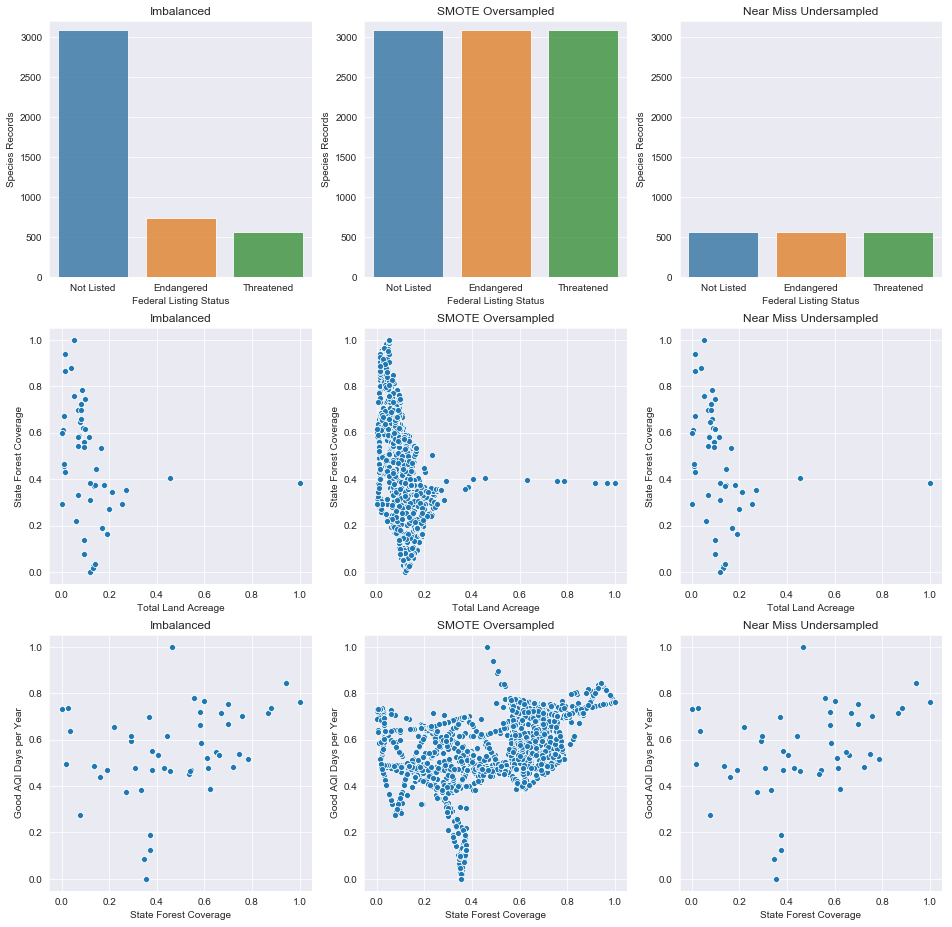

In [19]:
# plot comparison of unbalanced and balanced training sets
fig, axes = plt.subplots(3, 3, figsize=(16,16))

sns.countplot(y_train,       order=y_train.value_counts().index, alpha=0.8, ax = axes[0,0])
sns.countplot(y_train_smote, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,1])
sns.countplot(y_train_under, order=y_train.value_counts().index, alpha=0.8, ax = axes[0,2])
axes[0,0].set_ylim(0,3200)
axes[0,1].set_ylim(0,3200)
axes[0,2].set_ylim(0,3200)
axes[0,0].set_title(label='Imbalanced')
axes[0,1].set_title(label='SMOTE Oversampled')
axes[0,2].set_title(label='Near Miss Undersampled')
axes[0,0].set(xlabel='Federal Listing Status', ylabel='Species Records')
axes[0,1].set(xlabel='Federal Listing Status', ylabel='Species Records')
axes[0,2].set(xlabel='Federal Listing Status', ylabel='Species Records')

sns.scatterplot(x=X_train.columns[0],       y=X_train.columns[1],       data=X_train,       ax = axes[1,0])
sns.scatterplot(x=X_train_smote.columns[0], y=X_train_smote.columns[1], data=X_train_smote, ax = axes[1,1])
sns.scatterplot(x=X_train_under.columns[0], y=X_train_under.columns[1], data=X_train_under, ax = axes[1,2])
axes[1,0].set_title(label='Imbalanced')
axes[1,1].set_title(label='SMOTE Oversampled')
axes[1,2].set_title(label='Near Miss Undersampled')

sns.scatterplot(x=X_train.columns[1],       y=X_train.columns[2],       data=X_train,       ax = axes[2,0])
sns.scatterplot(x=X_train_smote.columns[1], y=X_train_smote.columns[2], data=X_train_smote, ax = axes[2,1])
sns.scatterplot(x=X_train_under.columns[1], y=X_train_under.columns[2], data=X_train_under, ax = axes[2,2])
axes[2,0].set_title(label='Imbalanced')
axes[2,1].set_title(label='SMOTE Oversampled')
axes[2,2].set_title(label='Near Miss Undersampled')

### Data Loading

In [20]:
X_train.to_pickle("../Data/X_train.pkl")
X_test.to_pickle( "../Data/X_test.pkl")
y_train.to_pickle("../Data/y_train.pkl")
y_test.to_pickle( "../Data/y_test.pkl")

X_train_smote.to_pickle("../Data/X_train_smote.pkl")
y_train_smote.to_pickle("../Data/y_train_smote.pkl")

X_train_under.to_pickle("../Data/X_train_under.pkl")
y_train_under.to_pickle("../Data/y_train_under.pkl")

pd.DataFrame(y_labels).to_pickle('../Data/y_labels.pkl')